In [1]:
import awkward as ak
import pickle
import matplotlib.pyplot as plt

In [2]:
model_list = ["H-HAN", "ParticleNet", "PUMINet"]

In [3]:
def get_filename_from_model(model):
    return "data/"+model+"_mu60_10k_events_test_results.pkl"

In [4]:
def load_jets_from_file(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data["jets"]

In [5]:
def get_resolution(jet_array):
    mask = jet_array[:,:,4]>0.2
    jet_true_efrac = jet_array[mask][:,:,4]
    jet_pred_efrac = jet_array[mask][:,:,6]
    jet_energy_resolution = (jet_pred_efrac - jet_true_efrac) / jet_true_efrac
    jet_true_mfrac = jet_array[mask][:,:,5]
    jet_pred_mfrac = jet_array[mask][:,:,7]
    jet_mass_resolution = (jet_pred_mfrac - jet_true_mfrac) / jet_true_mfrac
    return jet_energy_resolution, jet_mass_resolution

In [6]:
def get_results(model):
    filename = get_filename_from_model(model)
    jets = load_jets_from_file(filename)
    energy_resolution, mass_resolution = get_resolution(jets)
    print("Results for ", model)
    print("\tMean: ", ak.mean(energy_resolution))
    print("\tResolution: ", ak.std(energy_resolution))
    print()
    return [energy_resolution, mass_resolution]

In [7]:
results = {}
for model in model_list:
    results[model] = get_results(model)

Results for  H-HAN
	Mean:  -0.08065685217633642
	Resolution:  0.2259347448189208

Results for  ParticleNet
	Mean:  -0.11734753056585295
	Resolution:  0.34601342277901553

Results for  PUMINet
	Mean:  -0.8098876820496357
	Resolution:  0.4171387978476173



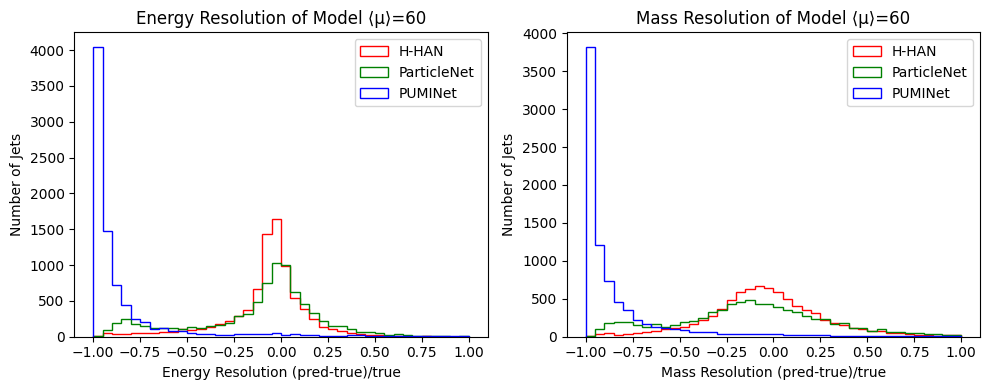

In [9]:
color_list = ['r','g','b']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, model in enumerate(results):
    axes[0].hist(ak.ravel(results[model][0]), histtype='step', label=model, color=color_list[i], bins=40, range=(-1,1))
    axes[1].hist(ak.ravel(results[model][1]), histtype='step', label=model, color=color_list[i], bins=40, range=(-1,1))

axes[0].set_title("Energy Resolution of Model \u27E8\u03BC\u27E9=60")
axes[0].legend()
axes[0].set_xlabel('Energy Resolution (pred-true)/true')
axes[0].set_ylabel('Number of Jets')

axes[1].set_title("Mass Resolution of Model \u27E8\u03BC\u27E9=60")
axes[1].legend()
axes[1].set_xlabel('Mass Resolution (pred-true)/true')
axes[1].set_ylabel('Number of Jets')

plt.tight_layout()
plt.show()